In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_style("darkgrid", {"axes.facecolor": ".6"})

d1=pd.read_csv("usertweetsnickyannotated.csv",encoding="latin1")
from datetime import datetime
dt=[]
for i in d1['Date']:
    ts = int(i)

    # if you encounter a "year is out of range" error the timestamp
    # may be in milliseconds, try `ts /= 1000` in that case
    dt.append(datetime.utcfromtimestamp(ts).strftime('%Y-%m-%d %H:%M:%S'))
    #print(datetime.utcfromtimestamp(ts).strftime('%Y-%m-%d %H:%M:%S'))
d1['dt']=dt
    
d1

d1['month']=d1['dt'].apply(lambda x :x[5:7])
d1
b1z=d1.groupby('month')['classofspeech'].count()
b1z

month
05    1076
06    1026
07    1022
08    1032
09    1147
10    1152
11     449
Name: classofspeech, dtype: int64

In [2]:
o1=d1[d1['classofspeech']=='hate_speech'].groupby('month',sort=True).count()
o1

,Unnamed: 0,Date,Name,Tweets,Tags,Hashtags,classofspeech,dt
month,,,,,,,,
06,1,1,1,1,0,1,1,1
08,1,1,1,1,0,1,1,1
09,3,3,3,3,0,3,3,3
11,1,1,1,1,0,1,1,1


In [3]:
o=d1[d1['classofspeech']=='offensive_language'].groupby('month',sort=True).count()
o

,Unnamed: 0,Date,Name,Tweets,Tags,Hashtags,classofspeech,dt
month,,,,,,,,
05,37,37,37,37,0,37,37,37
06,33,33,33,33,0,33,33,33
07,49,49,49,49,0,49,49,49
08,38,38,38,38,0,38,38,38
09,85,85,85,85,0,85,85,85
10,62,62,62,62,0,62,62,62
11,28,28,28,28,0,28,28,28


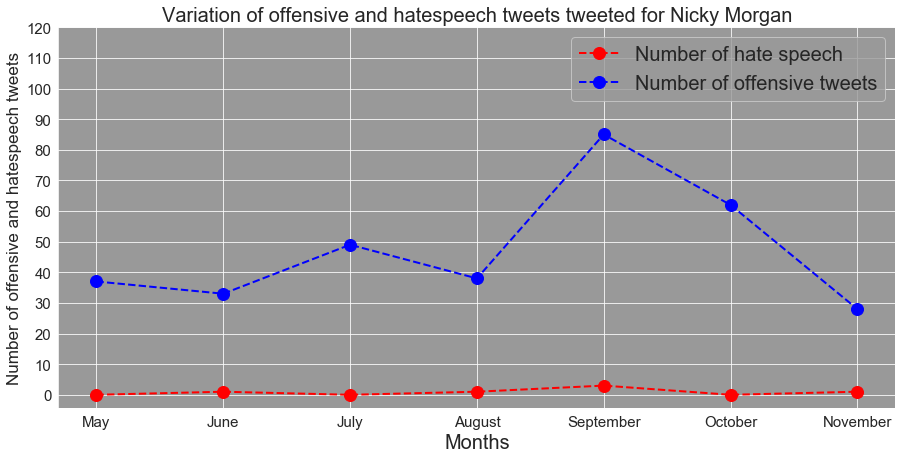

In [5]:
month=["May","June","July","August","September","October","November"]
hs=[0,1,0,1,3,0,1]
off=[37,33,49,38,85,62,28]
fig, ax = plt.subplots(figsize=(15,7))
ax.plot(month, hs,color='red', marker='o', linestyle='dashed',linewidth=2, markersize=12,label="Number of hate speech")#
ax.plot(month, off,color='blue', marker='o', linestyle='dashed',linewidth=2, markersize=12,label="Number of offensive tweets")
ax.set_xlabel('Months',fontsize=20)
plt.xticks(month)
plt.yticks(np.arange(0,130,10))

ax.set_ylabel('Number of offensive and hatespeech tweets',fontsize=17)
ax.set_title("Variation of offensive and hatespeech tweets tweeted for Nicky Morgan",fontsize=20)
ax = plt.gca()
ax.legend(prop={'size': 20})

ax.tick_params(axis = 'both', which = 'major', labelsize = 15)  


In [6]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_style("darkgrid", {"axes.facecolor": ".6"})

d1=pd.read_csv("nickytweetedannotated.csv",encoding="latin1")
d1

,Unnamed: 0,date,name,tweet,classofspeech
0,0,2019-10-31,Nicky Morgan,And it has always been a huge pleasure to work...,neither
1,1,2019-10-31,Nicky Morgan,Thank you Tony - a huge pleasure to work with ...,neither
2,2,2019-10-31,Nicky Morgan,Thank you!,neither
3,3,2019-10-31,Nicky Morgan,For the first time in 18 years I won't be a ca...,neither
4,4,2019-10-30,Nicky Morgan,Very pleased to see this happen https://twitte...,neither
...,...,...,...,...,...
408,408,2019-05-02,Nicky Morgan,DonÃ¢ÂÂt let the showers put you off voting ...,neither
409,409,2019-05-02,Nicky Morgan,Lots of campaign day activity going on in Loug...,neither
410,410,2019-05-02,Nicky Morgan,Polls are open today 7am - 10pm - #VoteConserv...,neither
411,411,2019-05-01,Nicky Morgan,Kind; thank you but the excellent Rory Stewart...,neither


In [7]:
d1['month']=d1['date'].apply(lambda x :x[5:7])
d1

,Unnamed: 0,date,name,tweet,classofspeech,month
0,0,2019-10-31,Nicky Morgan,And it has always been a huge pleasure to work...,neither,10
1,1,2019-10-31,Nicky Morgan,Thank you Tony - a huge pleasure to work with ...,neither,10
2,2,2019-10-31,Nicky Morgan,Thank you!,neither,10
3,3,2019-10-31,Nicky Morgan,For the first time in 18 years I won't be a ca...,neither,10
4,4,2019-10-30,Nicky Morgan,Very pleased to see this happen https://twitte...,neither,10
...,...,...,...,...,...,...
408,408,2019-05-02,Nicky Morgan,DonÃ¢ÂÂt let the showers put you off voting ...,neither,05
409,409,2019-05-02,Nicky Morgan,Lots of campaign day activity going on in Loug...,neither,05
410,410,2019-05-02,Nicky Morgan,Polls are open today 7am - 10pm - #VoteConserv...,neither,05
411,411,2019-05-01,Nicky Morgan,Kind; thank you but the excellent Rory Stewart...,neither,05


In [8]:
b1z=d1.groupby('month',sort=True)['classofspeech'].count()
b1z

month
05    89
06    98
07    61
08    36
09    64
10    65
Name: classofspeech, dtype: int64

In [9]:
d1['classofspeech'].unique()

array(['neither', 'offensive_language'], dtype=object)

In [10]:
o1=d1[d1['classofspeech']=='hate_speech'].groupby('month',sort=True).count()
o1

,Unnamed: 0,date,name,tweet,classofspeech
month,,,,,


In [11]:
o2=d1[d1['classofspeech']=='offensive_language']
l=len(o2)
abusers=[]
for i in range(l):
    #haters.append(o2.loc[o2.classofspeech=='hate_speech','username'].values[i])
    abusers.append(o2.loc[o2.classofspeech=='offensive_language','screen_name'].values[i])
    #print (o2.loc[o2.classofspeech=='hate_speech','username'].values[i])
abusers


KeyError: 'screen_name'

In [12]:

dis=set()
for i in abusers:
    count=0
    for j in o2['screen_name']:
    
        if i==j:
           count+=1 
        if count==2:
            dis.add(j)
            print (count,j)
dis            

set()

In [13]:
o=d1[d1['classofspeech']=='offensive_language'].groupby('month',sort=True).count()
o

,Unnamed: 0,date,name,tweet,classofspeech
month,,,,,
05,4,4,4,4,4
06,4,4,4,4,4
07,3,3,3,3,3
09,1,1,1,1,1
10,1,1,1,1,1


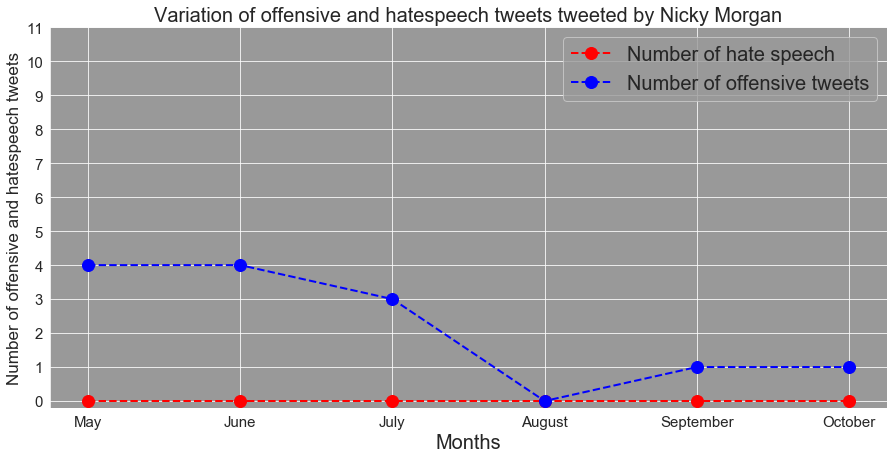

In [14]:
month=["May","June","July","August","September","October"]
hs=[0,0,0,0,0,0]
off=[4,4,3,0,1,1]
fig, ax = plt.subplots(figsize=(15,7))
ax.plot(month, hs,color='red', marker='o', linestyle='dashed',linewidth=2, markersize=12,label="Number of hate speech")#
ax.plot(month, off,color='blue', marker='o', linestyle='dashed',linewidth=2, markersize=12,label="Number of offensive tweets")
ax.set_xlabel('Months',fontsize=20)
plt.yticks(np.arange(0,12,1))

ax.set_ylabel('Number of offensive and hatespeech tweets',fontsize=17)
ax.set_title("Variation of offensive and hatespeech tweets tweeted by Nicky Morgan",fontsize=20)
ax = plt.gca()
ax.legend(prop={'size': 20})

ax.tick_params(axis = 'both', which = 'major', labelsize = 15)  

In [8]:
sum(o['classofspeech'])

184

In [9]:
pero=[]
for i in o['classofspeech']:
    ans=i*100/sum(o['classofspeech'])
    #print (ans)
    pero.append(ans)
pero


[4.3478260869565215, 12.5, 12.5, 6.521739130434782, 25.0, 39.130434782608695]

In [10]:
xi=['May','June',"July",'August','September','October']


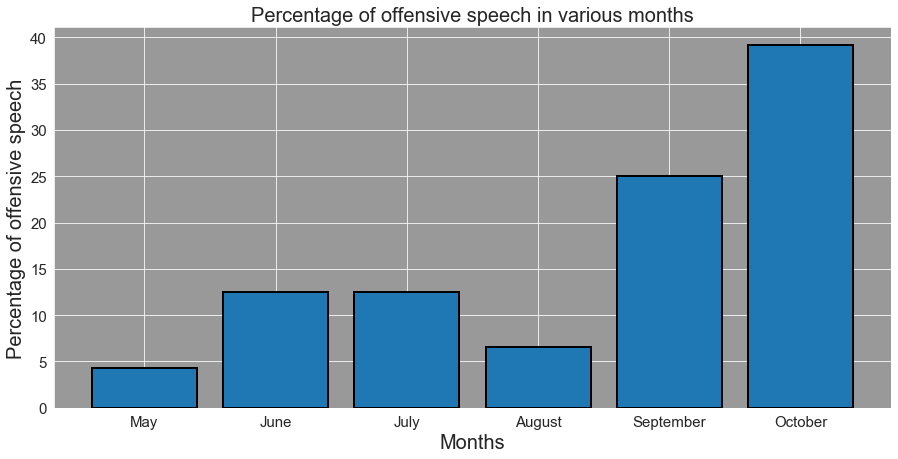

In [11]:

xi=['May','June',"July",'August','September','October']

#for i in pero.index:
   # xi.append(i)
yi=[]

for i in pero:
    yi.append(i)
fig, ax = plt.subplots(figsize=(15,7))
plt.bar(xi, yi, edgecolor = 'black', linewidth=2)

ax.set_xlabel('Months',fontsize=20)
ax.set_ylabel('Percentage of offensive speech',fontsize=20)
ax.set_title("Percentage of offensive speech in various months",fontsize=20)

ax = plt.gca()
ax.tick_params(axis = 'both', which = 'major', labelsize = 15)    
    

In [12]:
n=d1[d1['classofspeech']=='neither'].groupby('month',sort=True).count()
n

,Unnamed: 0,Unnamed: 0.1,Unnamed: 0.1.1,screen_name,username,user_id,tweet_id,tweet_url,timestamp,timestamp_epochs,...,img_urls,video_url,likes,retweets,replies,is_replied,is_reply_to,parent_tweet_id,reply_to_users,classofspeech
month,,,,,,,,,,,,,,,,,,,,,
5,265,265,265,265,265,265,265,265,265,265,...,265,0,265,265,265,265,265,105,265,265
6,293,293,293,293,293,293,293,293,293,293,...,293,0,293,293,293,293,293,102,293,293
7,314,314,314,314,314,314,314,314,314,314,...,314,0,314,314,314,314,314,129,314,314
8,169,169,169,169,169,169,169,169,169,169,...,169,0,169,169,169,169,169,93,169,169
9,584,584,584,584,584,584,584,584,584,584,...,584,0,584,584,584,584,584,205,584,584
10,692,692,692,692,692,692,692,692,692,692,...,692,0,692,692,692,692,692,271,692,692


In [13]:
pern=[]
for i in n['classofspeech']:
    ans=i*100/sum(n['classofspeech'])
    #print (ans)
    pern.append(ans)
pern


[11.437203280103581,
 12.645662494605093,
 13.552006905481226,
 7.293914544669832,
 25.20500647388865,
 29.86620630125162]

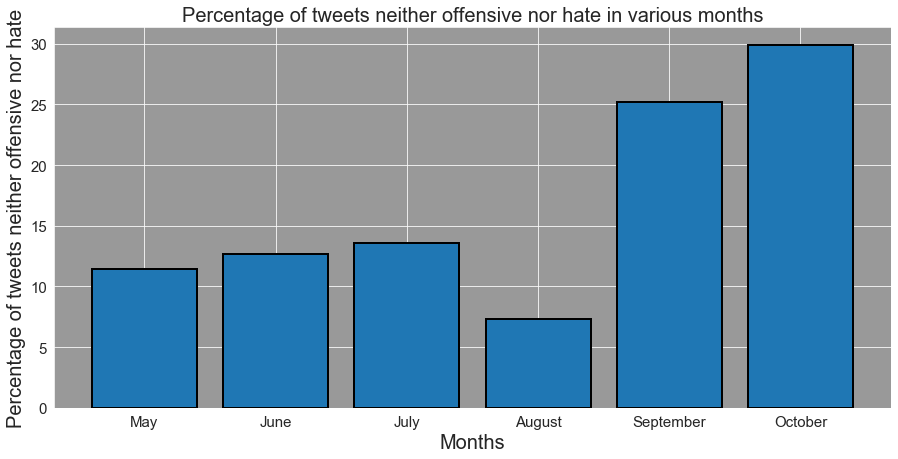

In [14]:

xi=['May','June',"July",'August','September','October']

#for i in pero.index:
   # xi.append(i)
yn=[]

for i in pern:
    yn.append(i)
fig, ax = plt.subplots(figsize=(15,7))
plt.bar(xi, yn, edgecolor = 'black', linewidth=2)

ax.set_xlabel('Months',fontsize=20)
ax.set_ylabel('Percentage of tweets neither offensive nor hate',fontsize=20)
ax.set_title("Percentage of tweets neither offensive nor hate in various months",fontsize=20)

ax = plt.gca()
ax.tick_params(axis = 'both', which = 'major', labelsize = 15)    
    

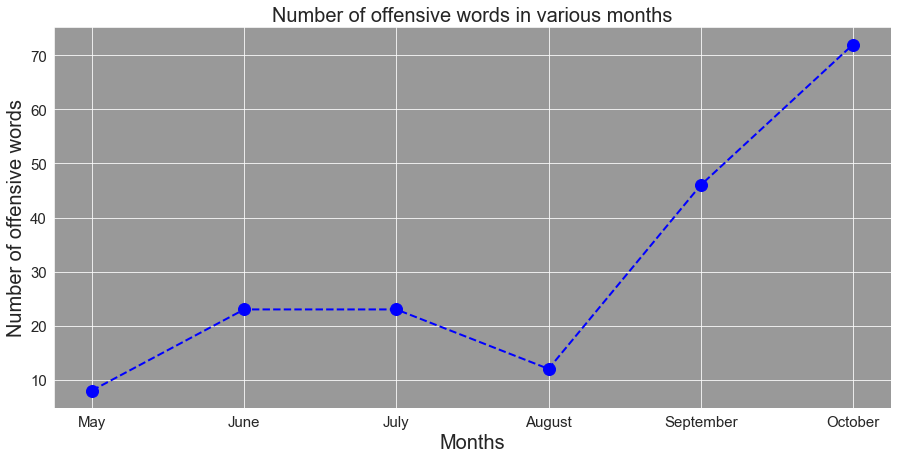

In [15]:

x=[]

for i in o['classofspeech'].index:
    x.append(i)
y=[]

for i in o['classofspeech']:
    y.append(i)
fig, ax = plt.subplots(figsize=(15,7))
ax.plot(xi, y,color='blue', marker='o', linestyle='dashed',linewidth=2, markersize=12)

ax.set_xlabel('Months',fontsize=20)
ax.set_ylabel('Number of offensive words',fontsize=20)
ax.set_title("Number of offensive words in various months",fontsize=20)

ax = plt.gca()
ax.tick_params(axis = 'both', which = 'major', labelsize = 15)    
    

In [15]:
from textblob import TextBlob
x=d1['text']
senti=[]
for i in x:
    senti.append(TextBlob(i).sentiment[0])
    #print (TextBlob(i).sentiment[0])
d1['senscores']=senti    
d1

,Unnamed: 0,Unnamed: 0.1,Unnamed: 0.1.1,screen_name,username,user_id,tweet_id,tweet_url,timestamp,timestamp_epochs,...,likes,retweets,replies,is_replied,is_reply_to,parent_tweet_id,reply_to_users,classofspeech,month,senscores
0,0,1703,1703,Rhiskiboi91,RÃÂÃÂ­an ÃÂÃÂ' Catharnaigh ÃÂ°ÃÂÃÂ...,333098431,1139278652401770496,/Rhiskiboi91/status/1139278652401770496,2019-06-13 21:09:32,1560460172,...,2,0,0,False,True,1.139135e+18,"[{'screen_name': 'ainefromderry', 'user_id': '...",neither,6,0.467273
1,1,5449,5449,eliesian,Iain Lees,769802145726132224,1174627552964546562,/eliesian/status/1174627552964546562,2019-09-19 10:13:26,1568888006,...,0,0,0,False,False,NaN,[],neither,9,0.000000
2,2,5058,5058,Theatremusing,Theatremusings,719706176649342977,1154373272403927040,/Theatremusing/status/1154373272403927040,2019-07-25 12:50:10,1564059010,...,0,0,0,False,False,NaN,[],neither,7,0.000000
3,3,1149,1149,dianas_house,Diane House Woodcock,22316199,1123989924431257602,/dianas_house/status/1123989924431257602,2019-05-02 16:37:35,1556815055,...,0,1,0,False,False,NaN,[],neither,5,0.250000
4,4,432,432,PennoftheNth,penny,1072947262781882368,1156793825567920128,/PennoftheNth/status/1156793825567920128,2019-08-01 05:08:34,1564636114,...,0,0,0,False,False,NaN,[],neither,8,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2496,2496,1113,1113,Chester66666666,ChesterCharlie6 Red #FBPE,1399929349,1125282960469630976,/Chester66666666/status/1125282960469630976,2019-05-06 06:15:39,1557123339,...,1,1,0,False,True,1.125045e+18,"[{'screen_name': 'lazaroumterror', 'user_id': ...",neither,5,0.000000
2497,2497,3340,3340,oliviawood0706,hopeinthefuture,1853730362,1189662771228659712,/oliviawood0706/status/1189662771228659712,2019-10-30 21:58:02,1572472682,...,0,0,0,False,True,1.189638e+18,"[{'screen_name': 'BrexitBetrayed', 'user_id': ...",neither,10,0.100000
2498,2498,1552,1552,Tonyhd16,Tonyhd,1070714172726501377,1131232280905691136,/Tonyhd16/status/1131232280905691136,2019-05-22 16:16:07,1558541767,...,1,0,0,False,True,1.131231e+18,"[{'screen_name': 'bbclaurak', 'user_id': '6118...",neither,5,0.000000
2499,2499,5337,5337,craftybookworm,Nicola ÃÂ¢ÃÂÃÂ,30026482,1175890233046568960,/craftybookworm/status/1175890233046568960,2019-09-22 21:50:53,1569189053,...,1,0,0,False,False,NaN,[],offensive_language,9,0.033333


In [16]:
len(d1)

2501

In [17]:
b=d1.groupby('month',sort=True)['senscores'].mean()
b

month
5     0.041107
6     0.041990
7     0.058630
8     0.043275
9     0.065788
10    0.027533
Name: senscores, dtype: float64

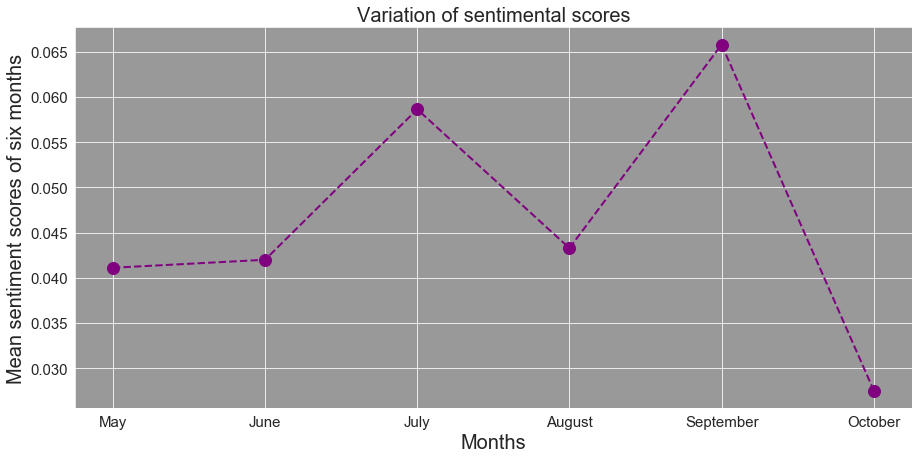

In [18]:


ys=[]

for i in b:
    ys.append(i)
fig, ax = plt.subplots(figsize=(15,7))
ax.plot(xi, ys,color='purple', marker='o', linestyle='dashed',linewidth=2, markersize=12)

ax.set_xlabel('Months',fontsize=20)
ax.set_ylabel('Mean sentiment scores of six months',fontsize=20)
ax.set_title("Variation of sentimental scores",fontsize=20)

ax = plt.gca()
ax.tick_params(axis = 'both', which = 'major', labelsize = 15)    

In [19]:
s = pd.Series(ys)
s=s*100
s

0    4.110679
1    4.198996
2    5.863016
3    4.327539
4    6.578840
5    2.753329
dtype: float64

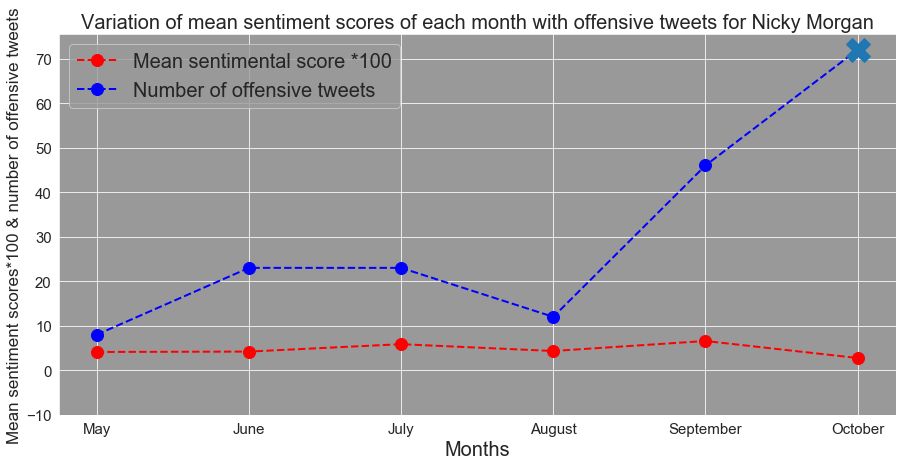

In [22]:
fig, ax = plt.subplots(figsize=(15,7))
ax.plot(xi, s,color='red', marker='o', linestyle='dashed',linewidth=2, markersize=12,label="Mean sentimental score *100")#
ax.plot(xi, y,color='blue', marker='o', linestyle='dashed',linewidth=2, markersize=12,label="Number of offensive tweets")
plt.plot('October',72, markersize=24,marker='X')
plt.yticks([-10,0,10,20,30,40,50,60,70])

ax.set_xlabel('Months',fontsize=20)
ax.set_ylabel('Mean sentiment scores*100 & number of offensive tweets',fontsize=17)
ax.set_title("Variation of mean sentiment scores of each month with offensive tweets for Nicky Morgan",fontsize=20)
ax = plt.gca()
ax.legend(prop={'size': 20})

ax.tick_params(axis = 'both', which = 'major', labelsize = 15)  

NameError: name 'perh1' is not defined

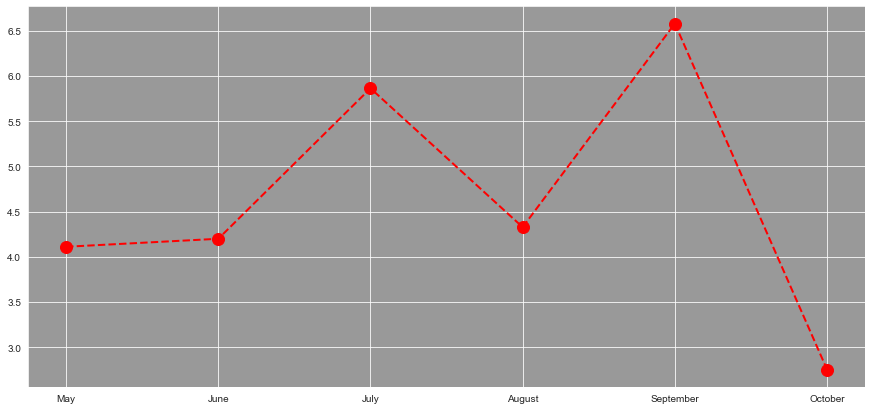

In [21]:
fig, ax = plt.subplots(figsize=(15,7))
ax.plot(xi, s,color='red', marker='o', linestyle='dashed',linewidth=2, markersize=12,label="Mean sentimental score *100")#
ax.plot(xi, perh1,color='blue', marker='o', linestyle='dashed',linewidth=2, markersize=12,label="Percentage of hate speech")

ax.set_xlabel('Months',fontsize=20)
ax.set_ylabel('Mean sentiment scores and % of hate speeches',fontsize=17)
ax.set_title("Variation of mean sentimental scores with % of hate speech for each month",fontsize=20)
ax = plt.gca()
ax.legend(prop={'size': 20})

ax.tick_params(axis = 'both', which = 'major', labelsize = 15)  

In [ ]:
b1z=d1.groupby('month',sort=True)['classofspeech'].count()
b1z

In [ ]:
d1['classofspeech'].unique()

In [ ]:
o=d1[d1['classofspeech']=='offensive_language'].groupby('month',sort=True).count()
o

In [ ]:
b1z=d1.groupby('month',sort=True)['classofspeech'].count()
b1z

In [ ]:
o2=d1[d1['classofspeech']=='hate_speech'].groupby('month',sort=True).count()
o2

In [ ]:
o=d1[d1['classofspeech']=='offensive_language'].groupby('month',sort=True).count()
o

In [ ]:
sum(o['classofspeech'])

In [ ]:
pero=[]
for i in o['classofspeech']:
    ans=i*100/sum(o['classofspeech'])
    #print (ans)
    pero.append(ans)
pero


In [ ]:

xi=['February','March','April','May','June',"July",'August']

#for i in pero.index:
   # xi.append(i)
yi=[]

for i in pero:
    yi.append(i)
fig, ax = plt.subplots(figsize=(15,7))
plt.bar(xi, yi, edgecolor = 'black', linewidth=2)

ax.set_xlabel('Months',fontsize=20)
ax.set_ylabel('Percentage of offensive speech',fontsize=20)
ax.set_title("Percentage of offensive speech in various months",fontsize=20)

ax = plt.gca()
ax.tick_params(axis = 'both', which = 'major', labelsize = 15)    
    

In [ ]:
fig, ax = plt.subplots(figsize=(15,7))
ax.plot(xi, pero,color='blue', marker='o', linestyle='dashed',linewidth=2, markersize=12,label="Caroline Spelman")

ax.plot(x1, y1,color='red', marker='o', linestyle='dashed',linewidth=2, markersize=12,label="Mark Lancaster")#

ax.set_xlabel('Months',fontsize=20)
plt.plot('September',36.170212765957444, markersize=24,marker='X')
plt.plot('November',60, markersize=24,marker='X')

ax.set_ylabel('% of offensive words',fontsize=17)
ax.set_title("Variation in offensive words where X denotes refrain or resignation",fontsize=20)
ax = plt.gca()
ax.legend(prop={'size': 20})

ax.tick_params(axis = 'both', which = 'major', labelsize = 15)  

In [ ]:
pero

In [ ]:
df=pd.read_csv("input2_threat_tom.csv")
df

In [ ]:
o3=df[df['classofspeech']=='offensive_language'].groupby('month',sort=True).count()
o3

In [ ]:
o33=df[df['classofspeech']=='hate_speech'].groupby('month',sort=True).count()
o33

In [ ]:
sum(o3['classofspeech'])

In [ ]:
pero3=[]
for i in o3['classofspeech']:
    ans=i*100/sum(o3['classofspeech'])
    #print (ans)
    pero3.append(ans)
pero3


In [ ]:
fig, ax = plt.subplots(figsize=(15,7))
ax.plot(xi, pero,color='blue', marker='o', linestyle='dashed',linewidth=2, markersize=12,label="Caroline Spelman")

ax.plot(x1, y1,color='red', marker='o', linestyle='dashed',linewidth=2, markersize=12,label="Mark Lancaster")#
ax.plot(x1, pero3,color='green', marker='o', linestyle='dashed',linewidth=2, markersize=12,label="Tom Watson")#

ax.set_xlabel('Months',fontsize=20)
plt.plot('September',36.170212765957444, markersize=24,marker='X')
plt.plot('November',60, markersize=24,marker='X')
plt.plot('November',20.73170731707317, markersize=24,marker='X')

ax.set_ylabel('% of offensive words',fontsize=17)
ax.set_title("Variation in offensive tweets where X denotes refrain or resignation",fontsize=20)
ax = plt.gca()
ax.legend(prop={'size': 20})

ax.tick_params(axis = 'both', which = 'major', labelsize = 15)  

In [ ]:
dff=pd.read_csv("input2_threat_Allen.csv")
dff

In [ ]:
o4=dff[dff['classofspeech']=='offensive_language'].groupby('month',sort=True).count()
o4

In [ ]:
sum(o3['classofspeech'])

In [ ]:
pero4=[]
for i in o4['classofspeech']:
    ans=i*100/sum(o4['classofspeech'])
    #print (ans)
    pero4.append(ans)
pero4


In [ ]:
peero4=[2.272727272727273,
 19.318181818181817,
 9.090909090909092,
 10.227272727272727,43.18181818181818,
 15.909090909090908]
x4=["September 2018",'October 2018','November 2018','December 2018','January 2018','February 2018']

In [ ]:
fig, ax = plt.subplots(figsize=(15,7))
ax.plot(x4, peero4,color='blue', marker='o', linestyle='dashed',linewidth=2, markersize=12,label="Heidi Allen")


ax.set_xlabel('Months',fontsize=20)

plt.plot('February',15.909090909090908, markersize=24,marker='X')
plt.yticks([0,10,20,30,40,50,60])
ax.set_ylabel('% of offensive words',fontsize=17)
ax.set_title("Variation in offensive words where X denotes refrain or resignation",fontsize=20)
ax = plt.gca()
ax.legend(prop={'size': 20})

ax.tick_params(axis = 'both', which = 'major', labelsize = 15)  

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_style("darkgrid", {"axes.facecolor": ".5"})

d1=pd.read_csv("input2_threat.csv",encoding="latin1")
d1

In [ ]:
b1z=d1.groupby('month',sort=True)['classofspeech'].count()
b1z

In [ ]:
d1['classofspeech'].unique()

In [ ]:
o=d1[d1['classofspeech']=='offensive_language'].groupby('month',sort=True).count()
o

In [2]:
sum(o['classofspeech'])

NameError: name 'o' is not defined

In [3]:
import requests
x=d1['text']
no_neg=[]
no_pos=[]
for i in x:
    response=requests.get(f'http://104.248.174.180/article_stats/?query={i}')
    #print(response.json())
    jsonobj=response.json()
    if response.status_code==200:
      #print (jsonobj['number_negative_words'])
      no_neg.append(jsonobj['number_negative_words'])
      print (jsonobj['number_positive_words'])
      no_pos.append(jsonobj['number_positive_words'])
    else:     

      no_neg.append(0)
      #print (jsonobj['number_of_words'])
      no_pos.append(0)

ConnectionError: HTTPConnectionPool(host='104.248.174.180', port=80): Max retries exceeded with url: /article_stats/?query=I'm%20glad%20she%20found%20the%20time%20to%20do%20one%20of%20BOJO!%20Aye%20of%20course%20with%20the%20new%20Wain%20and%20Wains%20when%20your%20good%20and%20ready%20%C3%83%C2%83%C3%82%C2%83%C3%83%C2%82%C3%82%C2%81ine!%20Also%20can%20i%20make%20a%20request%20ad%20Nicky%20Morgan%20to%20the%20list%20that%20would%20be%20hilarious%20also!%20 (Caused by NewConnectionError('<urllib3.connection.HTTPConnection object at 0x0000025FDBE6A548>: Failed to establish a new connection: [WinError 10060] A connection attempt failed because the connected party did not properly respond after a period of time, or established connection failed because connected host has failed to respond'))

In [16]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_style("darkgrid", {"axes.facecolor": ".6"})

df=pd.read_csv("negpos Nickymorgan.csv",encoding="latin1")
df

,Unnamed: 0,Unnamed: 0.1,Unnamed: 0.1.1,Unnamed: 0.1.1.1,screen_name,username,user_id,tweet_id,tweet_url,timestamp,...,retweets,replies,is_replied,is_reply_to,parent_tweet_id,reply_to_users,classofspeech,month,negativewords,positivewords
0,0,0,1703,1703,Rhiskiboi91,RÃÂÃÂ­an ÃÂÃÂ' Catharnaigh ÃÂ°ÃÂÃÂ...,333098431,1139278652401770496,/Rhiskiboi91/status/1139278652401770496,2019-06-13 21:09:32,...,0,0,False,True,1.139135e+18,"[{'screen_name': 'ainefromderry', 'user_id': '...",neither,6,0,5
1,1,1,5449,5449,eliesian,Iain Lees,769802145726132224,1174627552964546562,/eliesian/status/1174627552964546562,2019-09-19 10:13:26,...,0,0,False,False,NaN,[],neither,9,0,0
2,2,2,5058,5058,Theatremusing,Theatremusings,719706176649342977,1154373272403927040,/Theatremusing/status/1154373272403927040,2019-07-25 12:50:10,...,0,0,False,False,NaN,[],neither,7,0,0
3,3,3,1149,1149,dianas_house,Diane House Woodcock,22316199,1123989924431257602,/dianas_house/status/1123989924431257602,2019-05-02 16:37:35,...,1,0,False,False,NaN,[],neither,5,0,1
4,4,4,432,432,PennoftheNth,penny,1072947262781882368,1156793825567920128,/PennoftheNth/status/1156793825567920128,2019-08-01 05:08:34,...,0,0,False,False,NaN,[],neither,8,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2496,2496,2496,1113,1113,Chester66666666,ChesterCharlie6 Red #FBPE,1399929349,1125282960469630976,/Chester66666666/status/1125282960469630976,2019-05-06 06:15:39,...,1,0,False,True,1.125045e+18,"[{'screen_name': 'lazaroumterror', 'user_id': ...",neither,5,0,0
2497,2497,2497,3340,3340,oliviawood0706,hopeinthefuture,1853730362,1189662771228659712,/oliviawood0706/status/1189662771228659712,2019-10-30 21:58:02,...,0,0,False,True,1.189638e+18,"[{'screen_name': 'BrexitBetrayed', 'user_id': ...",neither,10,0,1
2498,2498,2498,1552,1552,Tonyhd16,Tonyhd,1070714172726501377,1131232280905691136,/Tonyhd16/status/1131232280905691136,2019-05-22 16:16:07,...,0,0,False,True,1.131231e+18,"[{'screen_name': 'bbclaurak', 'user_id': '6118...",neither,5,0,0
2499,2499,2499,5337,5337,craftybookworm,Nicola ÃÂ¢ÃÂÃÂ,30026482,1175890233046568960,/craftybookworm/status/1175890233046568960,2019-09-22 21:50:53,...,0,0,False,False,NaN,[],offensive_language,9,2,1


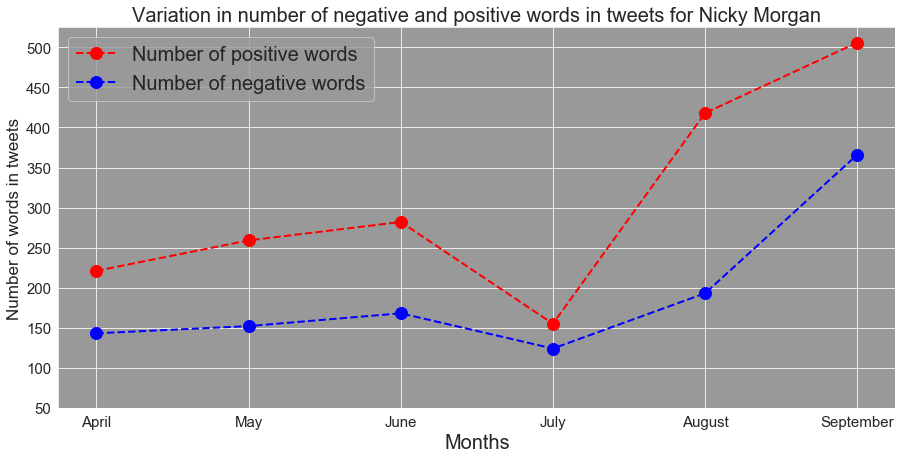

In [17]:
xi=['April','May','June','July','August','September']
kplus=df.groupby('month',sort=True)['positivewords'].sum()
plus=[]
for i in kplus:
    plus.append(i)
plus    
kneg=df.groupby('month',sort=True)['negativewords'].sum()
neg=[]
for i in kneg:
    neg.append(i)
    
neg
fig, ax = plt.subplots(figsize=(15,7))
ax.plot(xi, plus,color='red', marker='o', linestyle='dashed',linewidth=2, markersize=12,label="Number of positive words")#
ax.plot(xi, neg,color='blue', marker='o', linestyle='dashed',linewidth=2, markersize=12,label="Number of negative words")
plt.yticks([50,100,150,200,250,300,350,400,450,500])
ax.set_xlabel('Months',fontsize=20)
ax.set_ylabel('Number of words in tweets',fontsize=17)
ax.set_title("Variation in number of negative and positive words in tweets for Nicky Morgan",fontsize=20)
ax = plt.gca()
ax.legend(prop={'size': 20})

ax.tick_params(axis = 'both', which = 'major', labelsize = 15)  

c:\users\dell\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:15: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  from ipykernel import kernelapp as app


<Figure size 1080x504 with 0 Axes>

<Figure size 1080x504 with 0 Axes>

<Figure size 1080x504 with 0 Axes>

<Figure size 1080x504 with 0 Axes>

<Figure size 1080x504 with 0 Axes>

<Figure size 1080x504 with 0 Axes>

<Figure size 1080x504 with 0 Axes>

<Figure size 1080x504 with 0 Axes>

<Figure size 1080x504 with 0 Axes>

<Figure size 1080x504 with 0 Axes>

<Figure size 1080x504 with 0 Axes>

<Figure size 1080x504 with 0 Axes>

<Figure size 1080x504 with 0 Axes>

<Figure size 1080x504 with 0 Axes>

<Figure size 1080x504 with 0 Axes>

<Figure size 1080x504 with 0 Axes>

<Figure size 1080x504 with 0 Axes>

<Figure size 1080x504 with 0 Axes>

<Figure size 1080x504 with 0 Axes>

<Figure size 1080x504 with 0 Axes>

<Figure size 1080x504 with 0 Axes>

<Figure size 1080x504 with 0 Axes>

<Figure size 1080x504 with 0 Axes>

<Figure size 1080x504 with 0 Axes>

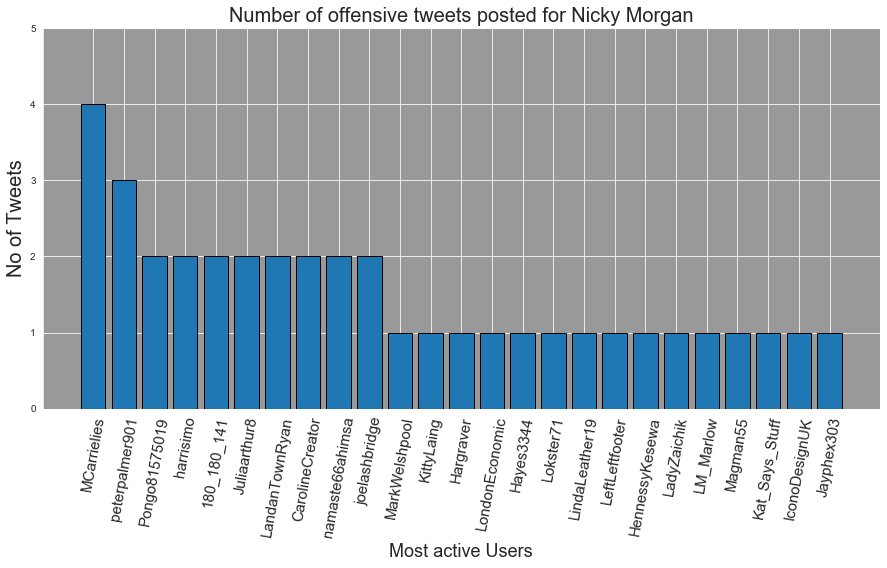

In [18]:
o10=d1[d1['classofspeech']=='offensive_language']
o10
usertweets = o10.groupby('screen_name')
#Taking the top 25 tweeting users
top_users = usertweets.count()['text'].sort_values(ascending = False)[:25]
top_users_dict = top_users.to_dict()
user_ordered_dict =sorted(top_users_dict.items(), key=lambda x:x[1])
user_ordered_dict = user_ordered_dict[::-1]
#Now, like in the previous hashtags and mention cases, going to make #two lists, one with the username and one with the value
dict_values = []
dict_keys = []
for item in user_ordered_dict[0:25]:
    dict_keys.append(item[0])
    dict_values.append(item[1])
    fig = plt.figure(figsize = (15,7))
index = np.arange(25)
plt.bar(index, dict_values, edgecolor = 'black', linewidth=1)
plt.xlabel('Most active Users', fontsize = 18)
plt.yticks([0,1,2,3,4,5])
plt.ylabel('No of Tweets', fontsize=20)
plt.xticks(index,dict_keys, fontsize=15, rotation=80)
plt.title('Number of offensive tweets posted for Nicky Morgan', fontsize = 20)
plt.show()

In [19]:
o2=d1[d1['classofspeech']=='offensive_language']
len(o2)

184

In [20]:
oh=d1[d1['classofspeech']=='hate_speech']
len(oh)

0

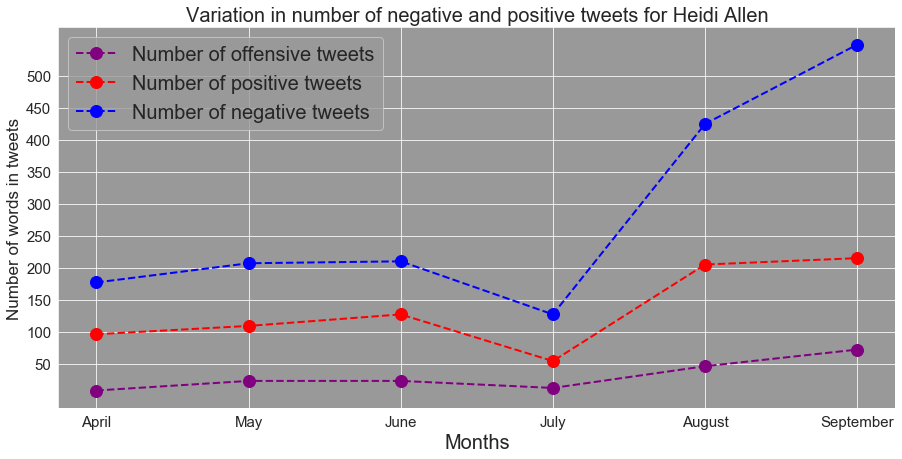

In [22]:
lab=[]
for i in range(len(df)):
    if df['negativewords'][i]>=df['positivewords'][i]:
        lab.append('n')
    else:
        lab.append('p')
lab   
df['speech']=lab
ol=df[df['speech']=='p'].groupby('month',sort=True).count()
ol
on=df[df['speech']=='n'].groupby('month',sort=True).count()
on
p=[]
for i in ol['positivewords']:
    p.append(i)
p    

n=[]
for i in on['positivewords']:
    n.append(i)
n
fig, ax = plt.subplots(figsize=(15,7))
ax.plot(xi, y,color='purple', marker='o', linestyle='dashed',linewidth=2, markersize=12,label="Number of offensive tweets")#

ax.plot(xi, p,color='red', marker='o', linestyle='dashed',linewidth=2, markersize=12,label="Number of positive tweets")#
ax.plot(xi, n,color='blue', marker='o', linestyle='dashed',linewidth=2, markersize=12,label="Number of negative tweets")
plt.yticks([50,100,150,200,250,300,350,400,450,500])
ax.set_xlabel('Months',fontsize=20)
ax.set_ylabel('Number of words in tweets',fontsize=17)
ax.set_title("Variation in number of negative and positive tweets for Heidi Allen",fontsize=20)
ax = plt.gca()
ax.legend(prop={'size': 20})

ax.tick_params(axis = 'both', which = 'major', labelsize = 15)  

In [26]:
hs=[0,0,0,0,0,0]

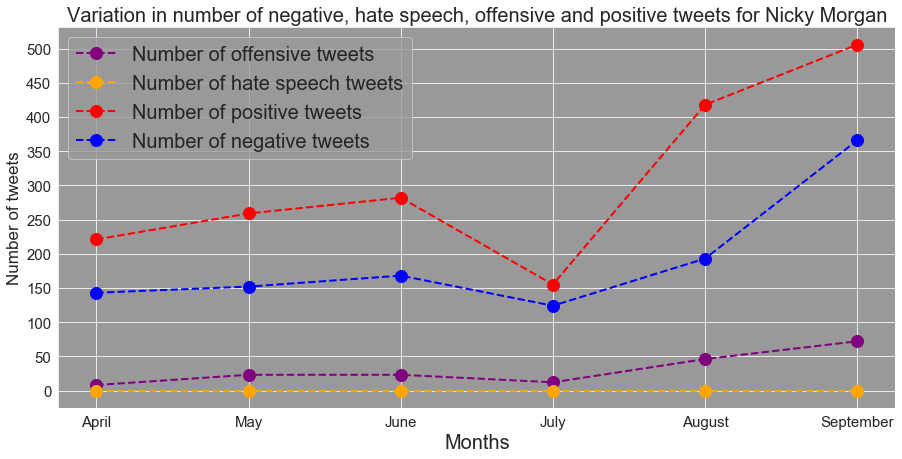

In [30]:
kplus=df.groupby('month',sort=True)['positivewords'].sum()
plus=[]
for i in kplus:
    plus.append(i)
plus    
kneg=df.groupby('month',sort=True)['negativewords'].sum()
neg=[]
for i in kneg:
    neg.append(i)
    
neg
fig, ax = plt.subplots(figsize=(15,7))
ax.plot(xi, y,color='purple', marker='o', linestyle='dashed',linewidth=2, markersize=12,label="Number of offensive tweets")#
ax.plot(xi, hs,color='orange', marker='o', linestyle='dashed',linewidth=2, markersize=12,label="Number of hate speech tweets")#

ax.plot(xi, plus,color='red', marker='o', linestyle='dashed',linewidth=2, markersize=12,label="Number of positive tweets")#
ax.plot(xi, neg,color='blue', marker='o', linestyle='dashed',linewidth=2, markersize=12,label="Number of negative tweets")
plt.yticks([0,50,100,150,200,250,300,350,400,450,500])
ax.set_xlabel('Months',fontsize=20)
ax.set_ylabel('Number of tweets',fontsize=17)
ax.set_title("Variation in number of negative, hate speech, offensive and positive tweets for Nicky Morgan",fontsize=20)
ax = plt.gca()
ax.legend(prop={'size': 20})

ax.tick_params(axis = 'both', which = 'major', labelsize = 15)  

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_style("darkgrid", {"axes.facecolor": ".5"})

d1=pd.read_csv("nickymorgan_stance.csv",encoding="latin1")
d1

,Unnamed: 0,date,name,tweet,stance
0,0,10,Nicky Morgan,And it has always been a huge pleasure to work...,stay
1,1,10,Nicky Morgan,Thank you Tony - a huge pleasure to work with ...,stay
2,2,10,Nicky Morgan,Thank you!,irrelevant
3,3,10,Nicky Morgan,For the first time in 18 years I won't be a ca...,leave
4,4,10,Nicky Morgan,Very pleased to see this happen https://twitte...,stay
...,...,...,...,...,...
408,408,5,Nicky Morgan,Donât let the showers put you off voting tod...,leave
409,409,5,Nicky Morgan,Lots of campaign day activity going on in Loug...,no sentiment
410,410,5,Nicky Morgan,Polls are open today 7am - 10pm - #VoteConserv...,no sentiment
411,411,5,Nicky Morgan,Kind; thank you but the excellent Rory Stewart...,stay


In [3]:
leave=d1[d1['stance']=='leave']
leave

,Unnamed: 0,date,name,tweet,stance
3,3,10,Nicky Morgan,For the first time in 18 years I won't be a ca...,leave
7,7,10,Nicky Morgan,Good luck with the book - a privilege to be in...,leave
9,9,10,Nicky Morgan,Amazing! Massive congratulations @EnglandRugby...,leave
10,10,10,Nicky Morgan,How we are working to ensure better mobile con...,leave
13,13,10,Nicky Morgan,Delighted to announce today a further Â£12 mil...,leave
...,...,...,...,...,...
393,393,5,Nicky Morgan,Clockwise Credit Union have been championing o...,leave
394,394,5,Nicky Morgan,Too many women face horrific abuse online and ...,leave
401,401,5,Nicky Morgan,Abiding message from doorsteps is âsort Brex...,leave
408,408,5,Nicky Morgan,Donât let the showers put you off voting tod...,leave


In [4]:
stay=d1[d1['stance']=='stay']
stay

,Unnamed: 0,date,name,tweet,stance
0,0,10,Nicky Morgan,And it has always been a huge pleasure to work...,stay
1,1,10,Nicky Morgan,Thank you Tony - a huge pleasure to work with ...,stay
4,4,10,Nicky Morgan,Very pleased to see this happen https://twitte...,stay
12,12,10,Nicky Morgan,#Loughborough has been announced as one of the...,stay
24,24,10,Nicky Morgan,Thanks for your support - you had a more produ...,stay
31,31,10,Nicky Morgan,Many congratulations - this is terrific news @...,stay
33,33,10,Nicky Morgan,Thank you for the invitation!,stay
40,40,10,Nicky Morgan,A pleasure to see you all. Thank you for the u...,stay
44,44,10,Nicky Morgan,Let's get Brexit done so we can focus on recru...,stay
61,61,10,Nicky Morgan,Great to welcome so many students interested i...,stay


In [5]:
L=leave.groupby('date',sort=True)['stance'].count()
L


date
5     26
6     31
7     13
8     10
9     20
10    20
Name: stance, dtype: int64

In [14]:
months=['May','June','July','August','September','October']

In [7]:
lea=[]
for i in L:
    print (i)
    lea.append(i)
lea    

26
31
13
10
20
20


[26, 31, 13, 10, 20, 20]

In [9]:
S=stay.groupby('date',sort=True)['stance'].count()
S

date
5     15
6     13
7      7
8      4
9      7
10    11
Name: stance, dtype: int64

In [12]:
sta=[]
for i in S:
    sta.append(i)
    print (i)
sta    

15
13
7
4
7
11


[15, 13, 7, 4, 7, 11]

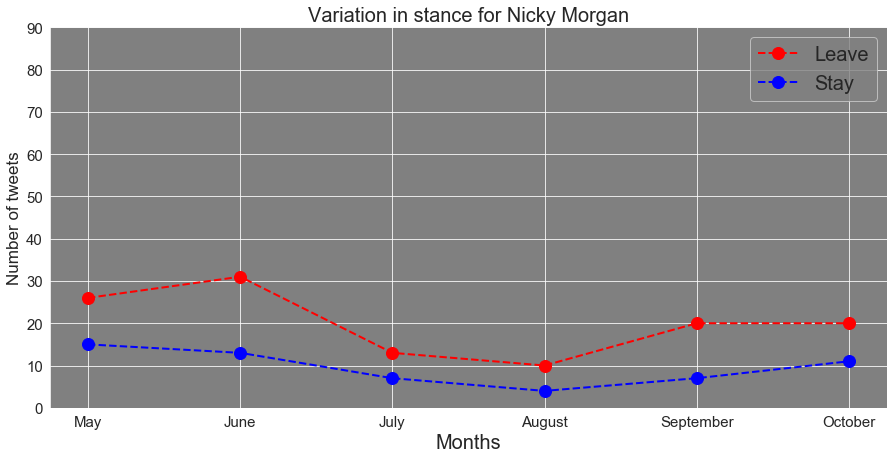

In [35]:
fig, ax = plt.subplots(figsize=(15,7))

ax.plot(months, lea,color='red', marker='o', linestyle='dashed',linewidth=2, markersize=12,label="Leave")#
ax.plot(months, sta,color='blue', marker='o', linestyle='dashed',linewidth=2, markersize=12,label="Stay")
ax.set_xlabel('Months',fontsize=20)
plt.yticks([0,10,20,30,40,50,60,70,80,90])

ax.set_ylabel('Number of tweets',fontsize=17)
ax.set_title("Variation in stance for Nicky Morgan",fontsize=20)
ax = plt.gca()
ax.legend(prop={'size': 20})

ax.tick_params(axis = 'both', which = 'major', labelsize = 15)  

In [20]:
o=d1[d1['classofspeech']=='offensive_language']
o.to_csv('ni.csv')

In [21]:
import pandas as pd
import numpy as np

# Read in the data
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df=pd.read_csv('ni.csv')

# Sample the data to speed up computation
# Comment out this line to match with lecture
#df = df.sample(frac=0.1, random_state=10)
print (f"Shape of dataframe is {df.shape}")
df.head()
X=df['text']
#Z=df['Tweet']
Z=df['text']

#print (df['Tweet'])

#print (X)

print (Z)

Shape of dataframe is (184, 27)
0      Nicky Morgan gives a shit what the members thi...
1      This is very alarming Nicky Morgan was not my ...
2      But it worries me that people like Nicky Morga...
3      Nicky Morgan put her own career progression be...
4          Nicky Morgan.\nWhat the hell happened to you?
                             ...                        
179    You have sold your soul. You are allowing Domi...
180    I don't understand that position at all. Nicky...
181    She's a right one that Nicky Morgan. Can't she...
182    Q. Why is Nicky Morgan like an old bottle of V...
183    As one of the few women featured in the progra...
Name: text, Length: 184, dtype: object


In [22]:
import re  

import spacy

nlp = spacy.load('en_core_web_sm')

processed_tweets=[]

for tweet in range(0, len(X)):  
    processed_tweet = re.sub(r'\W', ' ', str(X[tweet]))

            
    # Remove all the special characters
    
    processed_tweet = re.sub(r'http\S+', ' ', processed_tweet)
    
    #processed_tweet = re.sub(r'https?:\/\/+', ' ', processed_tweet)
    
    #processed_tweet=re.sub(r'\w+:\/{2}[\d\w-]+(\.[\d\w-]+)*(?:(?:\/[^\s/]*))*', ' ',processed_tweet)
    
    processed_tweet=re.sub(r'www\S+', ' ', processed_tweet)
    
    processed_tweet=re.sub(r'co \S+', ' ', processed_tweet)
    # remove all single characters
    processed_tweet = re.sub(r'\s+[a-zA-Z]\s+', ' ', processed_tweet)
 
    # Remove single characters from the start
    processed_tweet = re.sub(r'\^[a-zA-Z]\s+', ' ', processed_tweet) 
 
    # Substituting multiple spaces with single space
    processed_tweet= re.sub(r'\s+', ' ', processed_tweet, flags=re.I)
 
    # Removing prefixed 'b'
    processed_tweet = re.sub(r'^b\s+', ' ', processed_tweet)
    
    processed_tweet = re.sub(r'\d','',processed_tweet)
    
    processed_tweet= re.sub(r'\s+', ' ', processed_tweet, flags=re.I)

 
    # Converting to Lowercase
    processed_tweet = processed_tweet.lower()
    
    processed_tweets.append(processed_tweet)
    
print (processed_tweets)    


 

['nicky morgan gives shit what the members think shocker seems like this is the remainers desperate last stand twitter com nickymorgan status ã â ã â ã â ã â ã â ', 'this is very alarming nicky morgan was not my cup of tea how ever she was mp who in my time on this earth remember mpã â ã â ã â were treated with upmost respect she should not had to leave politics because of the abuse on line all the best in the future nm ', 'but it worries me that people like nicky morgan may be back in cabinet people like her act as drag anchor ', 'nicky morgan put her own career progression before her conscience constituents and country twitter com davidlammy status ã â ã â ã â ã â ã â ', 'nicky morgan what the hell happened to you ', 'nicky morgan shock horror no surely not mrs iã â ã â ã â ll back anyone to keep my job knife in the back morgan well iã â ã â ã â never have believed it and cock mat sorry matt cock iã â ã â ã â surprised cleverlyã â ã â ã â not in there all shower of shit with no paper

In [23]:
import csv

i=0
for entry in processed_tweets:
    i+=1
    with open ('nicky.csv','a') as res:        
        writer=csv.writer(res)           
        #writer.writerow({i:"index" , ' '.join(entry):"tweet"})
        s="{},{}\n".format(i,entry)
        res.write(s)
        print (s)
        

1,nicky morgan gives shit what the members think shocker seems like this is the remainers desperate last stand twitter com nickymorgan status ã â ã â ã â ã â ã â 

2,this is very alarming nicky morgan was not my cup of tea how ever she was mp who in my time on this earth remember mpã â ã â ã â were treated with upmost respect she should not had to leave politics because of the abuse on line all the best in the future nm 

3,but it worries me that people like nicky morgan may be back in cabinet people like her act as drag anchor 

4,nicky morgan put her own career progression before her conscience constituents and country twitter com davidlammy status ã â ã â ã â ã â ã â 

5,nicky morgan what the hell happened to you 

6,nicky morgan shock horror no surely not mrs iã â ã â ã â ll back anyone to keep my job knife in the back morgan well iã â ã â ã â never have believed it and cock mat sorry matt cock iã â ã â ã â surprised cleverlyã â ã â ã â not in there all shower of shit with no paper

101,nicky morgan full of shit during and after pm may no change therw bbcqt

102,nicky morganã â ã â ã â doing an odemwingie sitting outside the the remain hq spouting she wants to join but sheã â ã â ã â ll be told to fuck off and have to go back to boris

103,nicky morgan can fuck right off with this shit 

104,it about time someone called out nicky morgan on her utterly spinelessness m always reminded of man for all seasons it profits person nothing to sell their soul for all the world but for the department of culture twitter com chunkymark status ã â ã â ã â ã â ã â 

105,sorry iã â ã â ã â not being clear you canã â ã â ã â just always say what you think sometimes you have to bite your tongue sometimes you have to take defeat and make the best of it look at the way nicky morgan has handled things she picks her battles and dissents without being an enemy 

106,didn realise nicky morgan was on postman pat feel old yet wonder who pulling her puppet strings brexitdealpic twitter com 

In [24]:
with open('nickycorpus.txt', 'w',encoding='utf-8') as f:
    for item in processed_tweets:
        f.write("%s\n" % item)

In [25]:
sample = open("nickycorpus.txt", "r",encoding='utf-8') 
s = sample.read() 

# Replaces escape character with space 
f = s.replace("\n", " ") 

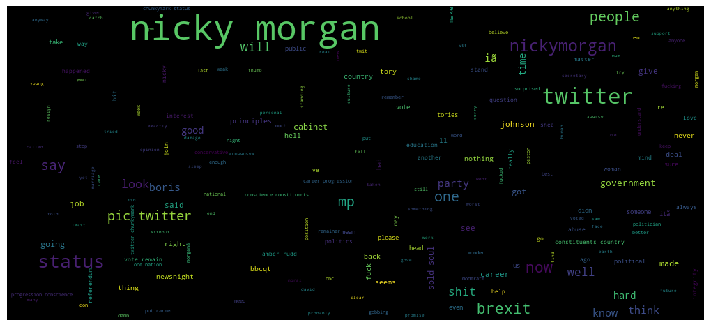

In [26]:
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt
#% matplotlib inline
wordcloud = WordCloud(
                          background_color='black',
                          #stopwords=stop_words,
                          max_words=200,
                          max_font_size=50, width=1000, height=450,
                          random_state=42
                         ).generate(f)
print(wordcloud)
plt.figure(figsize = (10, 10), facecolor = None) 
fig = plt.figure(1)
plt.imshow(wordcloud)
plt.tight_layout(pad=0)

plt.axis('off')
plt.show()
fig.savefig("word1.png", dpi=2500)
#plt.savefig('wordcloud.png', facecolor='k', bbox_inches='tight')


In [37]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_style("darkgrid", {"axes.facecolor": ".5"})

df=pd.read_csv("t_nicky.csv",encoding="latin1")
df['month']=df['date'].apply(lambda x :x[6:7])

df

,Unnamed: 0,date,name,tweet,classofspeech,month
0,394,2019-05-09,Nicky Morgan,Too many women face horrific abuse online and ...,neither,5
1,349,2019-05-19,Nicky Morgan,But so brave - 40 foot in the air!,neither,5
2,400,2019-05-05,Nicky Morgan,Great to see so many people at this yearÃ¢ÂÂ...,neither,5
3,353,2019-05-19,Nicky Morgan,*yawn*,neither,5
4,181,2019-07-22,Nicky Morgan,Last week @OneNationCons wrote to Boris Johnso...,neither,7
...,...,...,...,...,...,...
160,6,2019-10-28,Nicky Morgan,Honoured to be included in Diwali celebrations...,neither,0
161,298,2019-06-12,Nicky Morgan,Pleasure to take part https://twitter.com/Poli...,neither,6
162,284,2019-06-16,Nicky Morgan,Such a treat at #Aldeburgh to hear @GregRCiara...,neither,6
163,158,2019-08-09,Nicky Morgan,Great to see new visa plans from @No10 and @Ho...,neither,8


In [38]:
oh=df[df['classofspeech']=='hate_speech'].groupby('month',sort=True).count()
oh

,Unnamed: 0,date,name,tweet,classofspeech
month,,,,,


In [40]:
oh=df[df['classofspeech']=='neither'].groupby('month',sort=True).count()
oh

,Unnamed: 0,date,name,tweet,classofspeech
month,,,,,
0,29,29,29,29,29
5,37,37,37,37,37
6,29,29,29,29,29
7,22,22,22,22,22
8,14,14,14,14,14
9,29,29,29,29,29


In [41]:
ne=[37,29,22,14,29,29]

In [42]:
of=df[df['classofspeech']=='offensive_language'].groupby('month',sort=True).count()

of

,Unnamed: 0,date,name,tweet,classofspeech
month,,,,,
5,2,2,2,2,2
6,3,3,3,3,3


In [43]:
#off=[]
#for i in of['classofspeech']:
#    off.append(i)
off=[2,3,0,0,0,0]


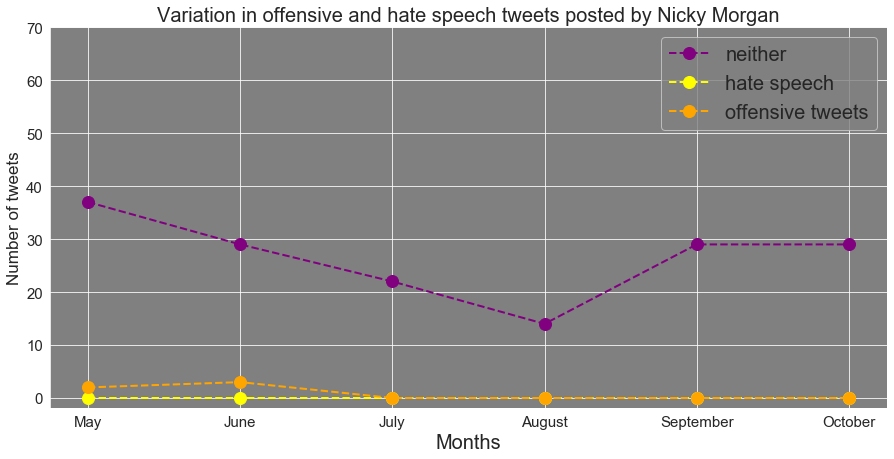

In [45]:
Months=["May",'June','July','August','September','October']
hat=[0,0,0,0,0,0]
fig, ax = plt.subplots(figsize=(15,7))
ax.plot(Months, ne,color='purple', marker='o', linestyle='dashed',linewidth=2, markersize=12,label="neither")#

ax.plot(Months, hat,color='yellow', marker='o', linestyle='dashed',linewidth=2, markersize=12,label="hate speech")#

ax.plot(Months, off,color='orange', marker='o', linestyle='dashed',linewidth=2, markersize=12,label="offensive tweets")#
plt.yticks([0,10,20,30,40,50,60,70])
ax.set_xlabel('Months',fontsize=20)
ax.set_ylabel('Number of tweets',fontsize=17)
ax.set_title("Variation in offensive and hate speech tweets posted by Nicky Morgan",fontsize=20)
ax = plt.gca()
ax.legend(prop={'size': 20})

ax.tick_params(axis = 'both', which = 'major', labelsize = 15)  

Shape of dataframe is (184, 27)
0      Nicky Morgan gives a shit what the members thi...
1      This is very alarming Nicky Morgan was not my ...
2      But it worries me that people like Nicky Morga...
3      Nicky Morgan put her own career progression be...
4          Nicky Morgan.\nWhat the hell happened to you?
                             ...                        
179    You have sold your soul. You are allowing Domi...
180    I don't understand that position at all. Nicky...
181    She's a right one that Nicky Morgan. Can't she...
182    Q. Why is Nicky Morgan like an old bottle of V...
183    As one of the few women featured in the progra...
Name: text, Length: 184, dtype: object


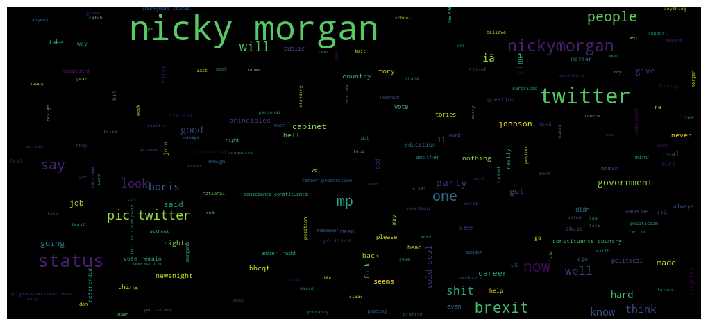

In [2]:
import pandas as pd
import numpy as np

# Read in the data
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

dff=pd.read_csv('final Nicky Morgan.csv')
df=dff[dff['classofspeech']=='offensive_language']

df.to_csv('offensive nicky.csv')

df=pd.read_csv('offensive nicky.csv')


# Sample the data to speed up computation
# Comment out this line to match with lecture
#df = df.sample(frac=0.1, random_state=10)
print (f"Shape of dataframe is {df.shape}")
df.head()
X=df['text']
#Z=df['Tweet']
Z=df['text']

#print (df['Tweet'])

#print (X)

print (Z)
import re  

import spacy

nlp = spacy.load('en_core_web_sm')

processed_tweets=[]

for tweet in range(0, len(X)):  
    processed_tweet = re.sub(r'\W', ' ', str(X[tweet]))

            
    # Remove all the special characters
    
    processed_tweet = re.sub(r'http\S+', ' ', processed_tweet)
    
    #processed_tweet = re.sub(r'https?:\/\/+', ' ', processed_tweet)
    
    #processed_tweet=re.sub(r'\w+:\/{2}[\d\w-]+(\.[\d\w-]+)*(?:(?:\/[^\s/]*))*', ' ',processed_tweet)
    
    processed_tweet=re.sub(r'www\S+', ' ', processed_tweet)
    
    processed_tweet=re.sub(r'co \S+', ' ', processed_tweet)
    # remove all single characters
    processed_tweet = re.sub(r'\s+[a-zA-Z]\s+', ' ', processed_tweet)
 
    # Remove single characters from the start
    processed_tweet = re.sub(r'\^[a-zA-Z]\s+', ' ', processed_tweet) 
 
    # Substituting multiple spaces with single space
    processed_tweet= re.sub(r'\s+', ' ', processed_tweet, flags=re.I)
 
    # Removing prefixed 'b'
    processed_tweet = re.sub(r'^b\s+', ' ', processed_tweet)
    
    processed_tweet = re.sub(r'\d','',processed_tweet)
    
    processed_tweet= re.sub(r'\s+', ' ', processed_tweet, flags=re.I)

 
    # Converting to Lowercase
    processed_tweet = processed_tweet.lower()
    
    processed_tweets.append(processed_tweet)
    
#print (processed_tweets)    


with open('nickyoffensivecorpus.txt', 'w',encoding='utf-8') as f:
    for item in processed_tweets:
        f.write("%s\n" % item)
sample = open("nickyoffensivecorpus.txt", "r",encoding='utf-8') 
s = sample.read() 

# Replaces escape character with space 
f = s.replace("\n", " ")   
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt
#% matplotlib inline
wordcloud = WordCloud(
                          background_color='black',
                          #stopwords=stop_words,
                          max_words=200,
                          max_font_size=50, width=1000, height=450,
                          random_state=42
                         ).generate(f)
print(wordcloud)
plt.figure(figsize = (10, 10), facecolor = None) 
fig = plt.figure(1)
plt.imshow(wordcloud)
plt.tight_layout(pad=0)

plt.axis('off')
plt.show()
#fig.savefig("word1.png", dpi=2500)
#plt.savefig('wordcloud.png', facecolor='k', bbox_inches='tight')


Shape of dataframe is (5, 6)
0    Eid Mubarak to all Loughborough constituents c...
1    Delighted to join you all https://twitter.com/...
2                                         So tempting!
3        #C4Debate #Gove4PM pic.twitter.com/L2o9XJleRJ
4                  #Gove4PM pic.twitter.com/MUX0bAi8xJ
Name: tweet, dtype: object


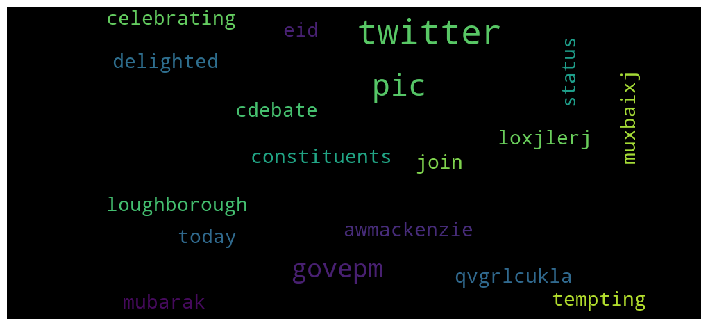

In [3]:
import pandas as pd
import numpy as np

# Read in the data
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

dff=pd.read_csv('t_nicky.csv')
df=dff[dff['classofspeech']=='offensive_language']

df.to_csv('offensenicky.csv')

df=pd.read_csv('offensenicky.csv')


# Sample the data to speed up computation
# Comment out this line to match with lecture
#df = df.sample(frac=0.1, random_state=10)
print (f"Shape of dataframe is {df.shape}")
df.head()
X=df['tweet']
#Z=df['Tweet']
Z=df['tweet']

#print (df['Tweet'])

#print (X)

print (Z)
import re  

import spacy

nlp = spacy.load('en_core_web_sm')

processed_tweets=[]

for tweet in range(0, len(X)):  
    processed_tweet = re.sub(r'\W', ' ', str(X[tweet]))

            
    # Remove all the special characters
    
    processed_tweet = re.sub(r'http\S+', ' ', processed_tweet)
    
    #processed_tweet = re.sub(r'https?:\/\/+', ' ', processed_tweet)
    
    #processed_tweet=re.sub(r'\w+:\/{2}[\d\w-]+(\.[\d\w-]+)*(?:(?:\/[^\s/]*))*', ' ',processed_tweet)
    
    processed_tweet=re.sub(r'www\S+', ' ', processed_tweet)
    
    processed_tweet=re.sub(r'co \S+', ' ', processed_tweet)
    # remove all single characters
    processed_tweet = re.sub(r'\s+[a-zA-Z]\s+', ' ', processed_tweet)
 
    # Remove single characters from the start
    processed_tweet = re.sub(r'\^[a-zA-Z]\s+', ' ', processed_tweet) 
 
    # Substituting multiple spaces with single space
    processed_tweet= re.sub(r'\s+', ' ', processed_tweet, flags=re.I)
 
    # Removing prefixed 'b'
    processed_tweet = re.sub(r'^b\s+', ' ', processed_tweet)
    
    processed_tweet = re.sub(r'\d','',processed_tweet)
    
    processed_tweet= re.sub(r'\s+', ' ', processed_tweet, flags=re.I)

 
    # Converting to Lowercase
    processed_tweet = processed_tweet.lower()
    
    processed_tweets.append(processed_tweet)
    
#print (processed_tweets)    


with open('nickyoffensecorpus.txt', 'w',encoding='utf-8') as f:
    for item in processed_tweets:
        f.write("%s\n" % item)
sample = open("nickyoffensecorpus.txt", "r",encoding='utf-8') 
s = sample.read() 

# Replaces escape character with space 
f = s.replace("\n", " ")   
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt
#% matplotlib inline
wordcloud = WordCloud(
                          background_color='black',
                          #stopwords=stop_words,
                          max_words=200,
                          max_font_size=50, width=1000, height=450,
                          random_state=42
                         ).generate(f)
print(wordcloud)
plt.figure(figsize = (10, 10), facecolor = None) 
fig = plt.figure(1)
plt.imshow(wordcloud)
plt.tight_layout(pad=0)

plt.axis('off')
plt.show()
fig.savefig("word1.png", dpi=2500)
#plt.savefig('wordcloud.png', facecolor='k', bbox_inches='tight')


Shape of dataframe is (6, 8)
0              Is he going to set out his white lines?
1            Grovelling To The Racist PM Already I See
2                No-deal could kill Brexit altogether.
3    This is not a pantomime  this is peoples life'...
4    @NickyMorgan01 How can you sit on the front be...
5                            Why are you a hate group?
Name: Tweets, dtype: object


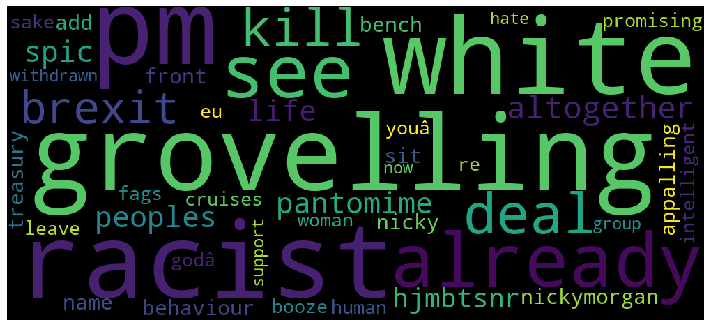

MemoryError: Unable to allocate array with shape (10881, 24180, 4) and data type uint8

In [25]:
import pandas as pd
import numpy as np

# Read in the data
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

dff=pd.read_csv('usertweetsnickyannotated.csv')
df=dff[dff['classofspeech']=='hate_speech']

df.to_csv('hatenicky.csv')

df=pd.read_csv('hatenicky.csv')


# Sample the data to speed up computation
# Comment out this line to match with lecture
#df = df.sample(frac=0.1, random_state=10)
print (f"Shape of dataframe is {df.shape}")
df.head()
X=df['Tweets']
#Z=df['Tweet']
Z=df['Tweets']

#print (df['Tweet'])

#print (X)

print (Z)
import re  

import spacy

nlp = spacy.load('en_core_web_sm')

processed_tweets=[]

for tweet in range(0, len(X)):  
    processed_tweet = re.sub(r'\W', ' ', str(X[tweet]))

            
    # Remove all the special characters
    
    processed_tweet = re.sub(r'http\S+', ' ', processed_tweet)
    
    #processed_tweet = re.sub(r'https?:\/\/+', ' ', processed_tweet)
    
    #processed_tweet=re.sub(r'\w+:\/{2}[\d\w-]+(\.[\d\w-]+)*(?:(?:\/[^\s/]*))*', ' ',processed_tweet)
    
    processed_tweet=re.sub(r'www\S+', ' ', processed_tweet)
    
    processed_tweet=re.sub(r'co \S+', ' ', processed_tweet)
    # remove all single characters
    processed_tweet = re.sub(r'\s+[a-zA-Z]\s+', ' ', processed_tweet)
 
    # Remove single characters from the start
    processed_tweet = re.sub(r'\^[a-zA-Z]\s+', ' ', processed_tweet) 
 
    # Substituting multiple spaces with single space
    processed_tweet= re.sub(r'\s+', ' ', processed_tweet, flags=re.I)
 
    # Removing prefixed 'b'
    processed_tweet = re.sub(r'^b\s+', ' ', processed_tweet)
    
    processed_tweet = re.sub(r'\d','',processed_tweet)
    
    processed_tweet= re.sub(r'\s+', ' ', processed_tweet, flags=re.I)

 
    # Converting to Lowercase
    processed_tweet = processed_tweet.lower()
    
    processed_tweets.append(processed_tweet)
    
#print (processed_tweets)    


with open('nickyhatecorpus.txt', 'w',encoding='utf-8') as f:
    for item in processed_tweets:
        f.write("%s\n" % item)
sample = open("nickyhatecorpus.txt", "r",encoding='utf-8') 
s = sample.read() 

# Replaces escape character with space 
f = s.replace("\n", " ")   
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt
#% matplotlib inline
stopwords= set(STOPWORDS)

stopwords.update(["status", "pic", "watson", "tom", "twitter",'people',"tom_watson","labour","time","party","think","going","set","lines"])

wordcloud = WordCloud(
                          background_color='black',
                          stopwords=stopwords,
                          max_words=200,
                          max_font_size=150, width=1000, height=450,
                          random_state=42
                         ).generate(f)
print(wordcloud)
plt.figure(figsize = (10, 10), facecolor = None) 
fig = plt.figure(1)
plt.imshow(wordcloud)
plt.tight_layout(pad=0)

plt.axis('off')
plt.show()
fig.savefig("word1.png", dpi=2500)
#plt.savefig('wordcloud.png', facecolor='k', bbox_inches='tight')


Shape of dataframe is (332, 8)
0      #LoanChargeScandal\r\n\r\nDoes one of you have...
1      The only way to get this is replace May. She w...
2      Wouldn't put you in charge of the Tea Caddy. I...
3      I think he is her husband and Leader of the Ch...
4      @NickyMorgan01   As my current MP Please do no...
                             ...                        
327    Do you understand that you are italian and tha...
328    You get back what you put in! Easy to blame ev...
329    You literally have no idea what you are talkin...
330    Your backward ideology gave us 9 years of stag...
331    Nice one Steve I want shit internet and big bi...
Name: Tweets, Length: 332, dtype: object


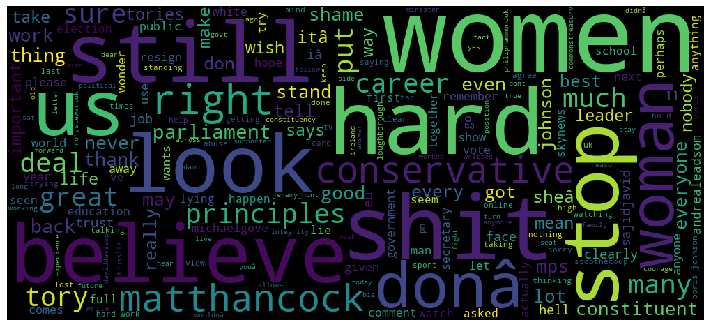

MemoryError: In RendererAgg: Out of memory

In [35]:
import pandas as pd
import numpy as np

# Read in the data
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

dff=pd.read_csv('usertweetsnickyannotated.csv')
df=dff[dff['classofspeech']=='offensive_language']

df.to_csv('offnicky.csv')

df=pd.read_csv('offnicky.csv')


# Sample the data to speed up computation
# Comment out this line to match with lecture
#df = df.sample(frac=0.1, random_state=10)
print (f"Shape of dataframe is {df.shape}")
df.head()
X=df['Tweets']
#Z=df['Tweet']
Z=df['Tweets']

#print (df['Tweet'])

#print (X)

print (Z)
import re  

import spacy

nlp = spacy.load('en_core_web_sm')

processed_tweets=[]

for tweet in range(0, len(X)):  
    processed_tweet = re.sub(r'\W', ' ', str(X[tweet]))

            
    # Remove all the special characters
    
    processed_tweet = re.sub(r'http\S+', ' ', processed_tweet)
    
    #processed_tweet = re.sub(r'https?:\/\/+', ' ', processed_tweet)
    
    #processed_tweet=re.sub(r'\w+:\/{2}[\d\w-]+(\.[\d\w-]+)*(?:(?:\/[^\s/]*))*', ' ',processed_tweet)
    
    processed_tweet=re.sub(r'www\S+', ' ', processed_tweet)
    
    processed_tweet=re.sub(r'co \S+', ' ', processed_tweet)
    # remove all single characters
    processed_tweet = re.sub(r'\s+[a-zA-Z]\s+', ' ', processed_tweet)
 
    # Remove single characters from the start
    processed_tweet = re.sub(r'\^[a-zA-Z]\s+', ' ', processed_tweet) 
 
    # Substituting multiple spaces with single space
    processed_tweet= re.sub(r'\s+', ' ', processed_tweet, flags=re.I)
 
    # Removing prefixed 'b'
    processed_tweet = re.sub(r'^b\s+', ' ', processed_tweet)
    
    processed_tweet = re.sub(r'\d','',processed_tweet)
    
    processed_tweet= re.sub(r'\s+', ' ', processed_tweet, flags=re.I)

 
    # Converting to Lowercase
    processed_tweet = processed_tweet.lower()
    
    processed_tweets.append(processed_tweet)
    
#print (processed_tweets)    


with open('nickyoffcorpus.txt', 'w',encoding='utf-8') as f:
    for item in processed_tweets:
        f.write("%s\n" % item)
sample = open("nickyoffcorpus.txt", "r",encoding='utf-8') 
s = sample.read() 

# Replaces escape character with space 
f = s.replace("\n", " ")   
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt
#% matplotlib inline
stopwords= set(STOPWORDS)

stopwords.update(["status", "pic", "watson", "need","re","morgan","cabinet",'real',"country","watson","support","nicky","tom", "twitter",'people',"tom_watson","labour","time","party","think","going","set","lines","nickymorgan","amberruddhr","will","one","brexit","say","mp","said","want","come","well","no","see","now","know","borisjohnson"])

wordcloud = WordCloud(
                          background_color='black',
                          stopwords=stopwords,
                          max_words=200,
                          max_font_size=150, width=1000, height=450,
                          random_state=42
                         ).generate(f)
print(wordcloud)
plt.figure(figsize = (10, 10), facecolor = None) 
fig = plt.figure(1)
plt.imshow(wordcloud)
plt.tight_layout(pad=0)

plt.axis('off')
plt.show()
fig.savefig("word1.png", dpi=2500)
#plt.savefig('wordcloud.png', facecolor='k', bbox_inches='tight')


In [21]:
for i in df['Tweets']:
    print (i)

#LoanChargeScandal

Does one of you have the courage to stop this murderous business? How much convincing do you need? 

@andrealeadsom @AmberRuddHR @BorisJohnson @ConorBurnsUK @daviddavismp @grahambradymp @jojohnson @Jeremy_Hunt @michaelgove @NickyMorgan01 @PennyMordaunthttps://twitter.com/Hoksipgao/status/1123466257582428167Â Â
The only way to get this is replace May. She will not budge on her deal, fact.
Wouldn't put you in charge of the Tea Caddy. I've never seen such a shambles in all my life. If ANY of you had ANY integrity, you'd all resign.
I think he is her husband and Leader of the Charnwood Council and she still did  support  her constituents! #betrayal
@NickyMorgan01   As my current MP Please do not misrepresent my voice by saying my local election vote against Conservatives & Labour was a vote "to get on with it". 
It categorically was NOT. 
Thank you.
You obviously didn't knock on many doors otherwise you would have heard that nobody wants to back Mays stitch up WA. Your